In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

**1. Считать в pandas.DataFrame любой источник данных:**

In [2]:
# Загрузка данных
df = pd.read_csv('speed_data_data.csv', sep=',')

**2. Датасет и подготовка данных, этап 1:**

Описание датасета

В 2002–2004 годах Колумбийский университет провел эксперимент по быстрым свиданиям, в ходе которого они отслеживали данные 21 сеанса быстрых свиданий, в основном среди молодых людей, встречающихся с людьми противоположного пола.

In [3]:
df.head(10)

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.0,69487.0,2.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,21.0,69487.0,2.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,0,21.0,69487.0,2.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0
5,0,21.0,69487.0,2.0,lawyer,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0
6,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,7.0,4.0,6.0,7.0,6.0,5.0,2.0
7,0,21.0,69487.0,2.0,lawyer,0,4.0,9.0,7.0,6.0,5.0,6.0,6.0,7.0,NaN
8,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,9.0,8.0,8.0,7.0,7.0,2.0
9,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,6.0,8.0,10.0,8.0,6.0,6.0,2.0



Видно, что в датасете есть и числовые, и категориальные признаки.

In [4]:
df.describe()

,gender,age,income,goal,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
count,8378.000000,8283.000000,4279.000000,8299.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000
mean,0.500597,26.358928,44887.606450,2.122063,0.419909,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.134087,5.207523,0.948769
std,0.500029,3.566763,17206.920962,1.407181,0.493573,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,1.841285,2.129565,0.989889
min,0.000000,18.000000,8607.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,31516.000000,1.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,0.000000
50%,1.000000,26.000000,43185.000000,2.000000,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,5.000000,0.000000
75%,1.000000,28.000000,54303.000000,2.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.000000
max,1.000000,55.000000,109031.000000,6.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000


Предобработка данных

In [5]:
# Проверка на наличие пропущенных значений
print(df.isnull().sum())

gender       0
age         95
income    4099
goal        79
career      89
dec          0
attr       202
sinc       277
intel      296
fun        350
amb        712
shar      1067
like       240
prob       309
met        375
dtype: int64


In [6]:
data = df.copy()
data.shape

(8378, 15)

In [7]:
data.dropna(inplace=True)

В датасете очень много пропущенных значений. Если удалить их то потеряется значительное количество данных. Вот пример

In [8]:
print('Размерность до', df.shape)

Размерность до (8378, 15)


In [9]:
print('Размерность после', data.shape)

Размерность после (3501, 15)


Решил заменить числовые значения средним, а категориальные модой например так.

In [10]:
# Замена пустых значений в числовых столбцах средним значением
numerical_columns = data.select_dtypes(include=[np.number]).columns
df[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [11]:
# Замена пустых значений в категориальных столбцах модой
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

Но я все равно решил удалить нулевые значения 👽

In [17]:
# Удаление пустых значений
df_cleaned = df.dropna()

In [18]:
df_cleaned.head(20)

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0.0,0.081081,0.606230,0.2,lawyer,1.0,0.6,0.9,0.7,0.7,0.6,0.5,0.7,0.6,0.250
1,0.0,0.081081,0.606230,0.2,lawyer,1.0,0.7,0.8,0.7,0.8,0.5,0.6,0.7,0.5,0.125
3,0.0,0.081081,0.606230,0.2,lawyer,1.0,0.7,0.6,0.8,0.7,0.6,0.8,0.7,0.6,0.250
4,0.0,0.081081,0.606230,0.2,lawyer,1.0,0.5,0.6,0.7,0.7,0.6,0.6,0.6,0.6,0.250
5,0.0,0.081081,0.606230,0.2,lawyer,0.0,0.4,0.9,0.7,0.4,0.6,0.4,0.6,0.5,0.250
6,0.0,0.081081,0.606230,0.2,lawyer,1.0,0.7,0.6,0.7,0.4,0.6,0.7,0.6,0.5,0.250
8,0.0,0.081081,0.606230,0.2,lawyer,1.0,0.7,0.6,0.8,0.9,0.8,0.8,0.7,0.7,0.250
9,0.0,0.081081,0.606230,0.2,lawyer,1.0,0.5,0.6,0.6,0.8,1.0,0.8,0.6,0.6,0.250
10,0.0,0.162162,0.570800,0.0,law,0.0,0.5,0.7,0.8,0.4,0.6,0.3,0.6,0.4,0.250
11,0.0,0.162162,0.570800,0.0,law,0.0,0.8,0.5,0.6,0.6,0.9,0.6,0.7,0.3,0.250


In [20]:
# Удаление некоторых признаков
df_cleaned = df_cleaned.drop(['career'], axis=1)

In [19]:
# Повторная проверка на наличие пропущенных значений
print(df_cleaned.isnull().sum())

gender    0
age       0
income    0
goal      0
career    0
dec       0
attr      0
sinc      0
intel     0
fun       0
amb       0
shar      0
like      0
prob      0
met       0
dtype: int64


Нормализация численных данных

In [23]:
scaler = StandardScaler()
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

Визуализация heatmap-матрицы корреляций

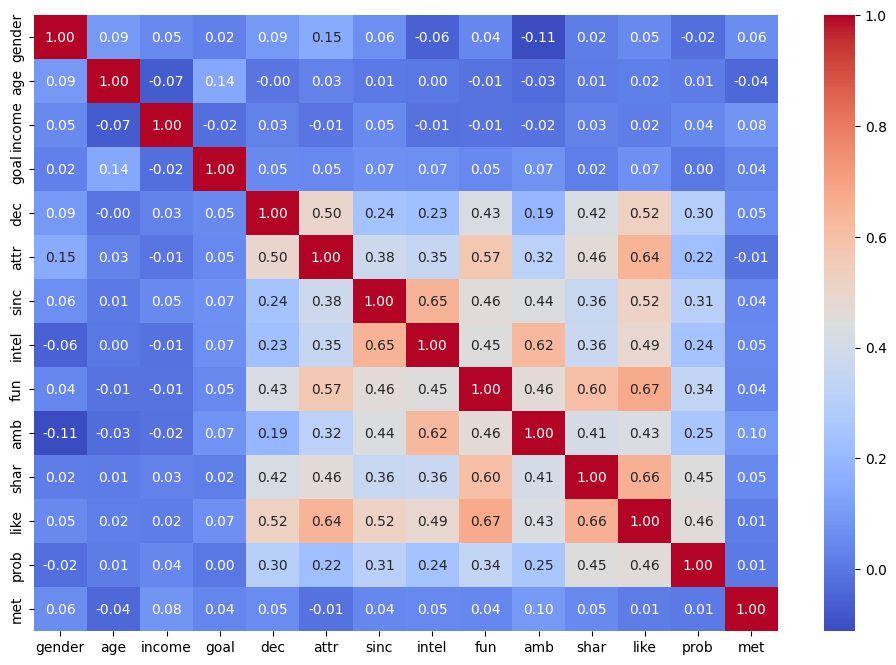

In [24]:
# Визуализация heatmap-матрицы коррелированности
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Визуализация взаимосвязей между target-переменной и каждым из признаков

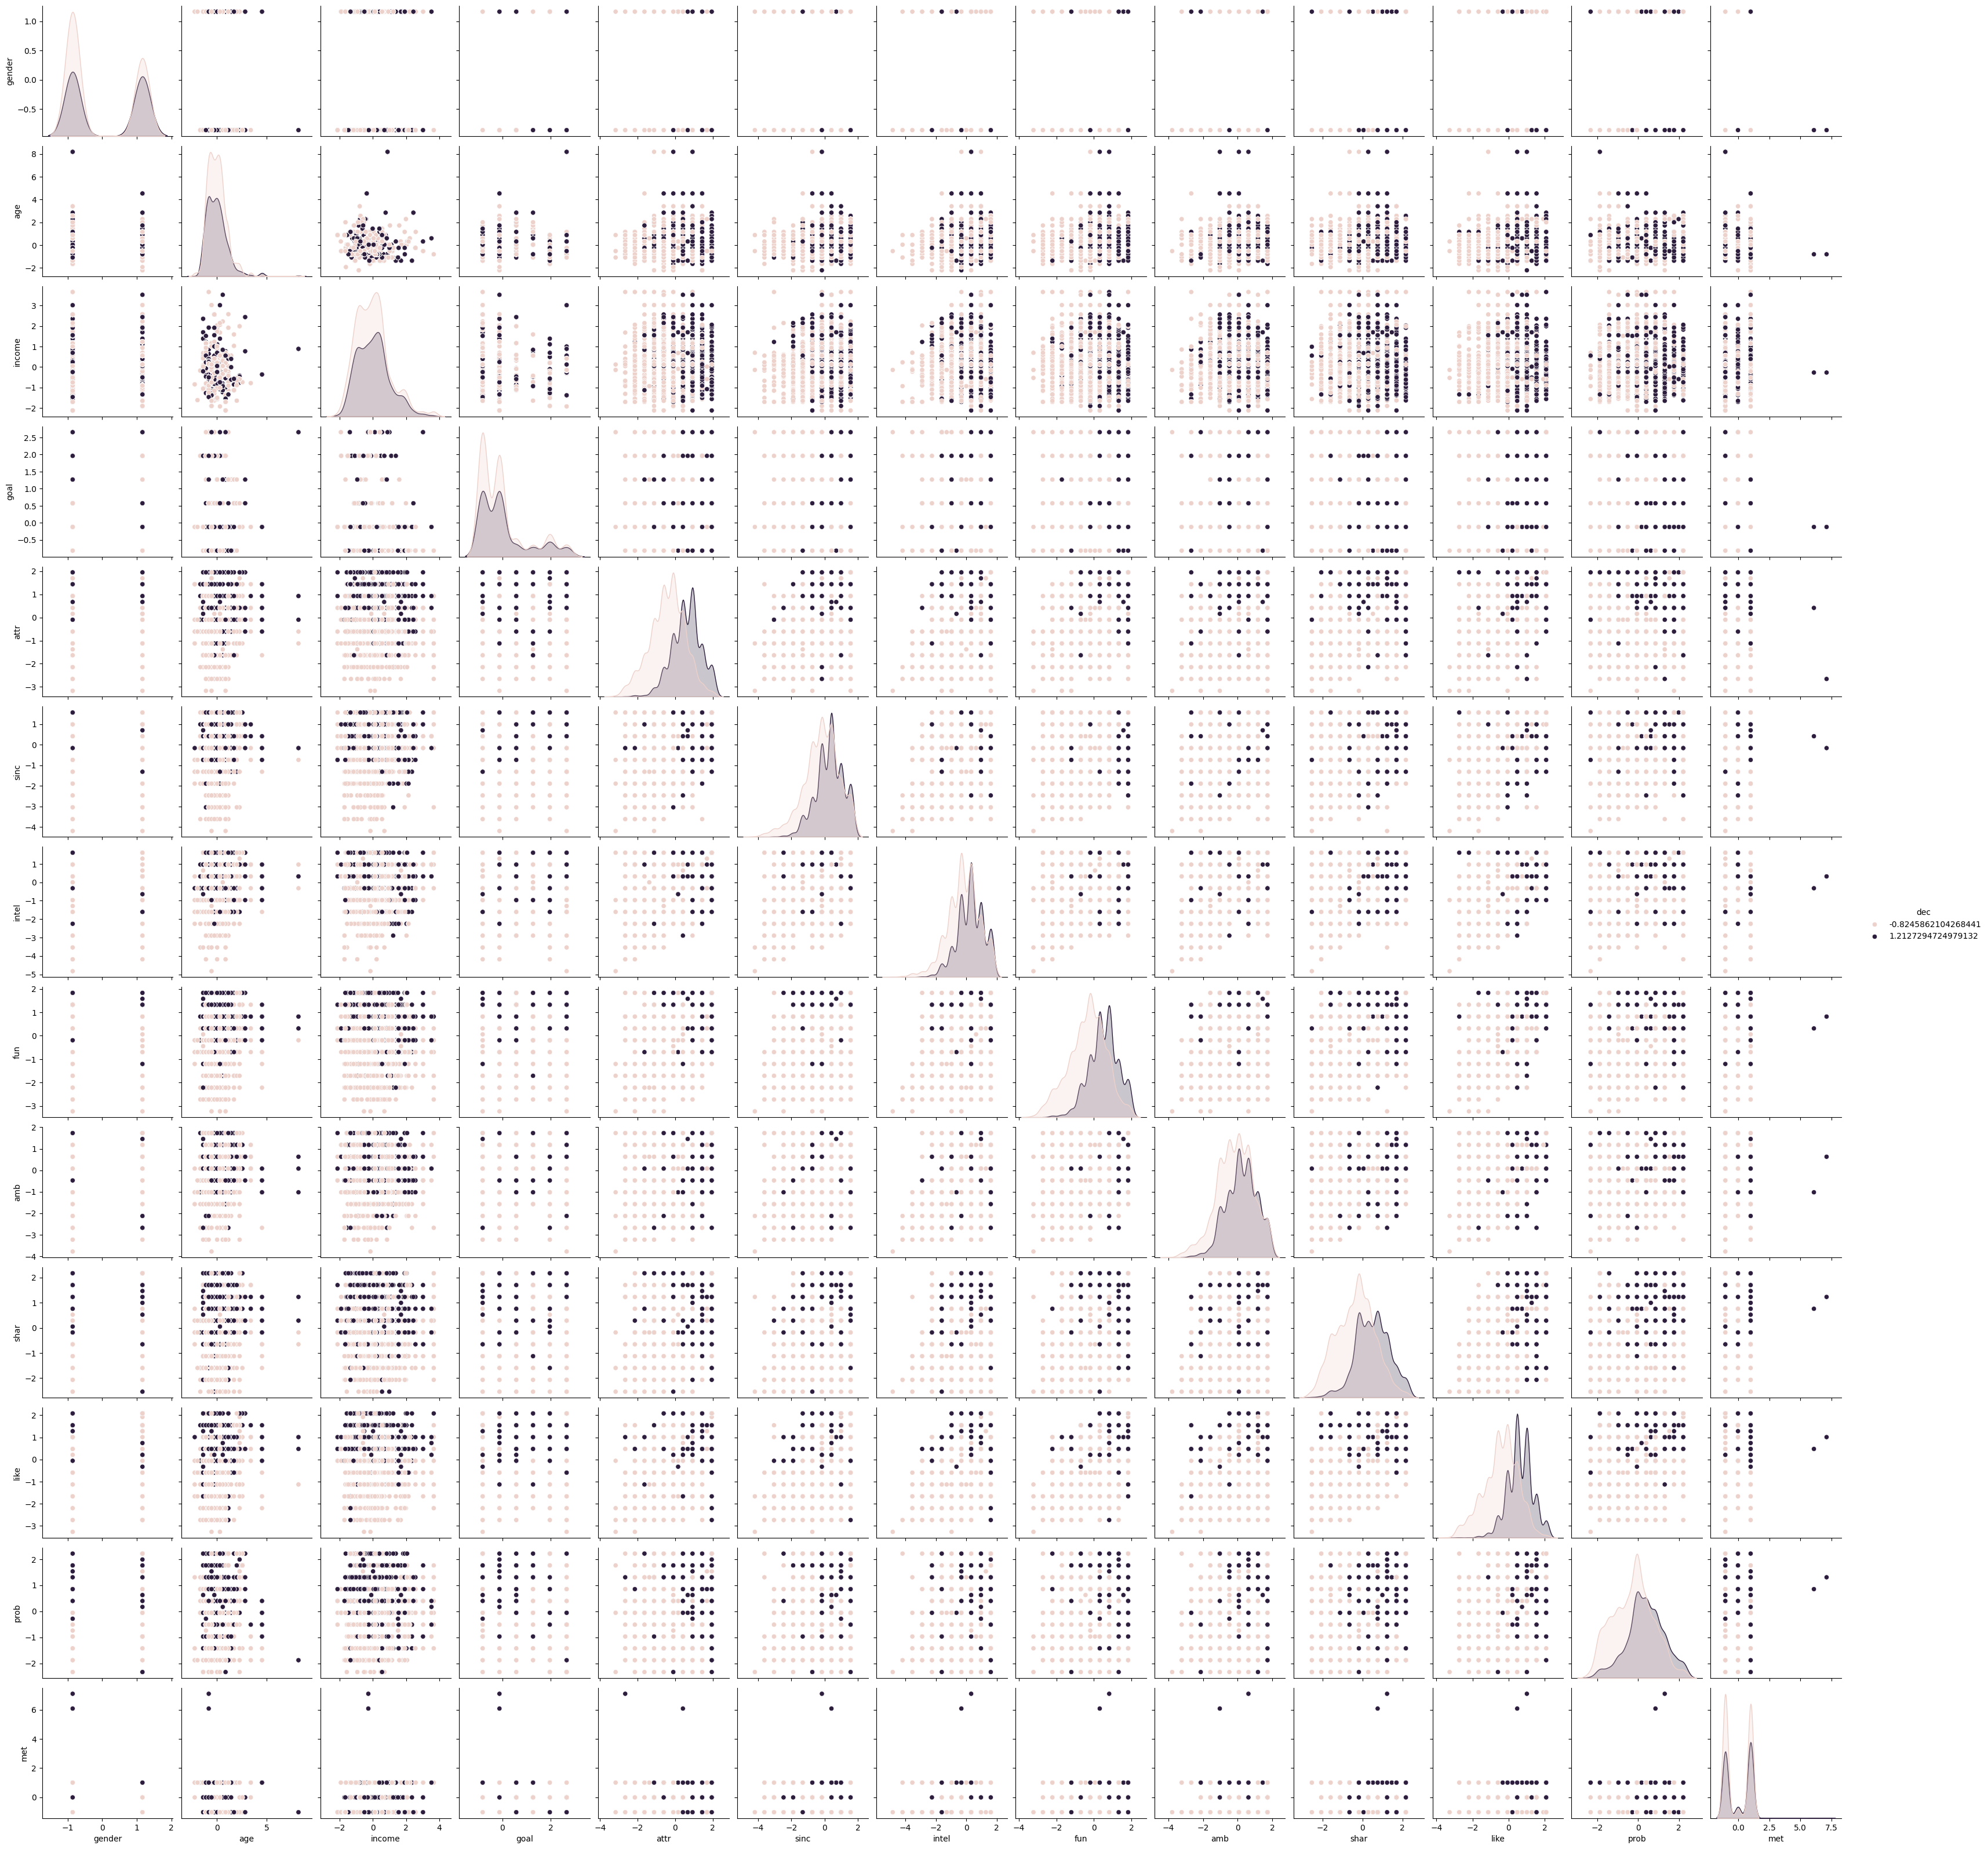

In [26]:
# Построение диаграммы попарного распределения
sns.pairplot(df_cleaned, hue='dec')
plt.show()

Разделение на обучающую и тестовую выборку

In [28]:
# Разделение выборки на обучающую и тестовую
X = df_cleaned.drop('dec', axis=1)
y = df_cleaned['dec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train_temp = X_train.select_dtypes(exclude=['object'])
X_test_temp = X_test.select_dtypes(exclude=['object'])

**3. Регрессия МНК:**

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

Обучение модели линейной регрессии

In [34]:
# Обучение модели Linear Regression
model = LinearRegression()
model.fit(X_train_temp, y_train)

LinearRegression()

In [35]:
# Предсказание на тестовом наборе
y_pred = model.predict(X_test_temp)

Вычисление метрик MSE, MAE, r2

In [36]:
# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 0.6422542000537592
Mean Absolute Error (MAE): 0.7075231327165121
R^2 Score: 0.3541826948441268


Вывод коэффициентов и свободного члена (intercept)

In [37]:
# Вывод коэффициентов и свободного члена
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [ 0.02650928 -0.01891964  0.0110315   0.03497476  0.2636685  -0.05264702
  0.00966898  0.07449874 -0.07982602  0.08532133  0.26102939  0.08546631
  0.05373439]
Intercept: 0.0026300202970438026


Визуализация важности коэффициентов

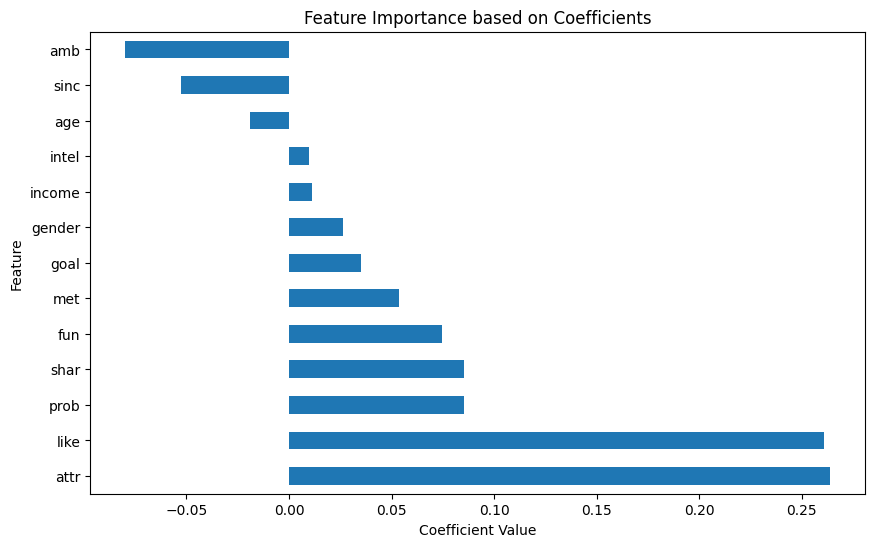

In [38]:
# Построение графика с важностью коэффициентов
plt.figure(figsize=(10, 6))
coef_importance = pd.Series(model.coef_, index=X_train_temp.columns)
coef_importance_sorted = coef_importance.sort_values(ascending=False)
coef_importance_sorted.plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance based on Coefficients')
plt.show()

**4. Для каждого вида регрессии (Ridge, LASSO, Elastic Net):**

In [39]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

Подбор параметров регуляризации

In [40]:
models = {
    'Ridge': (Ridge(), {'alpha': [0.1, 1, 10]}),
    'LASSO': (Lasso(), {'alpha': [0.1, 1, 10]}),
    'Elastic Net': (ElasticNet(), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]})
}

Сохраним лучшие модели сюда

In [41]:
best_models = {}

Сделаем цикл, тренируем и оценим модели Ridge, LASSO, Elastic Net

Best parameters for Ridge: {'alpha': 10}
Metrics for Ridge:
Mean Squared Error (MSE): 0.6423434156174077
Mean Absolute Error (MAE): 0.7077422570268072
R^2 Score: 0.3540929843293672
Coefficients for Ridge: [ 0.0266187  -0.01879959  0.01100199  0.03485411  0.26280067 -0.05178234
  0.00937469  0.07494502 -0.07907894  0.0856945   0.2595459   0.0853394
  0.05340747]
Intercept for Ridge: 0.0026237008601064375


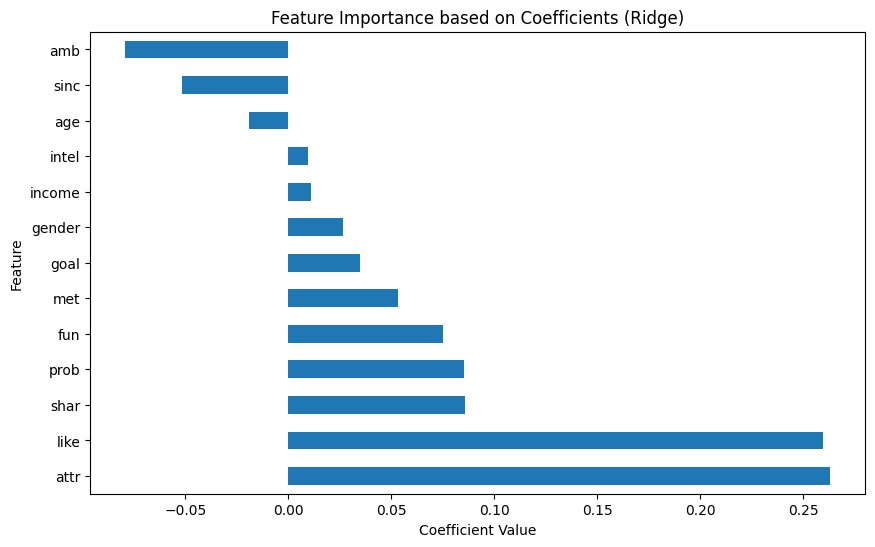

Best parameters for LASSO: {'alpha': 0.1}
Metrics for LASSO:
Mean Squared Error (MSE): 0.6802892382998345
Mean Absolute Error (MAE): 0.74717442330101
R^2 Score: 0.3159366453834541
Coefficients for LASSO: [ 0.         -0.          0.          0.          0.20374266  0.
  0.          0.01551355 -0.          0.05275564  0.24357297  0.00764631
  0.        ]
Intercept for LASSO: 0.0022499888815211153


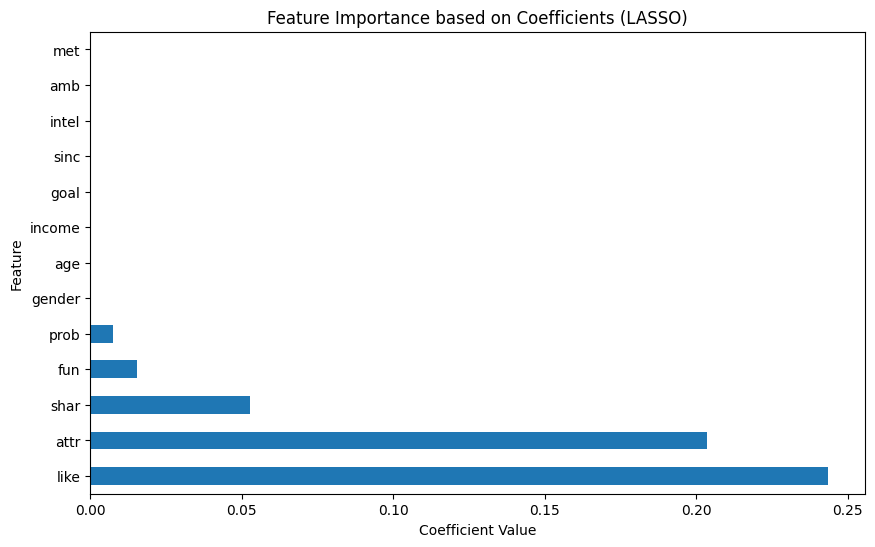

Best parameters for Elastic Net: {'alpha': 0.1, 'l1_ratio': 0.1}
Metrics for Elastic Net:
Mean Squared Error (MSE): 0.6498432445117034
Mean Absolute Error (MAE): 0.7165695814211077
R^2 Score: 0.34655154779965847
Coefficients for Elastic Net: [ 0.02150028 -0.00558003  0.00206961  0.0208411   0.23758902 -0.01495836
 -0.          0.07350146 -0.04651251  0.08752786  0.22412319  0.07353707
  0.03743773]
Intercept for Elastic Net: 0.0022835627796622573


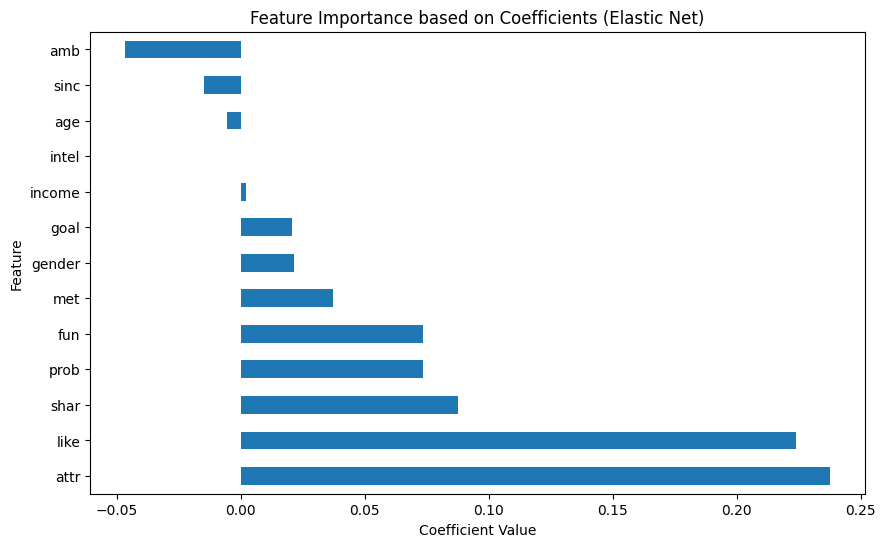

In [42]:
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_temp, y_train)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    print(f'Best parameters for {model_name}: {grid_search.best_params_}')

    # Предсказание на тестовом наборе
    y_pred = best_model.predict(X_test_temp)

    # Вычисление метрик
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Metrics for {model_name}:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R^2 Score: {r2}')

    # Вывод коэффициентов и свободного члена
    print(f'Coefficients for {model_name}: {best_model.coef_}')
    print(f'Intercept for {model_name}: {best_model.intercept_}')

    # Построение графика с важностью коэффициентов
    plt.figure(figsize=(10, 6))
    coef_importance = pd.Series(best_model.coef_, index=X_train_temp.columns)
    coef_importance_sorted = coef_importance.sort_values(ascending=False)
    coef_importance_sorted.plot(kind='barh')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance based on Coefficients ({model_name})')
    plt.show()

Для LASSO некоторые коэффициенты занулились.

**5. Датасет и подготовка данных, этап 2:**

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [52]:
data2 = df.copy()

In [53]:
data2.shape

(3501, 15)

In [54]:
# Разделение выборки на обучающую и тестовую
X = data2.drop('dec', axis=1)
y = data2['dec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Выберем категориальные признаки
categorical_features = X_train.select_dtypes(include=['object']).columns

In [56]:
categorical_features

Index(['career'], dtype='object')

In [57]:
# Объединим обучающую и тестовую выборки
X_combined = pd.concat([X_train, X_test], axis=0)

Применим One-Hot Encoding к категориальным признакам

In [59]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_combined_encoded = encoder.fit_transform(X_combined[categorical_features])
encoded_columns = encoder.get_feature_names_out(categorical_features)
X_combined_encoded_df = pd.DataFrame(X_combined_encoded, columns=encoded_columns, index=X_combined.index)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Удалим исходные категориальные признаки и добавим закодированные

In [60]:
X_combined.drop(categorical_features, axis=1, inplace=True)
X_combined = pd.concat([X_combined, X_combined_encoded_df], axis=1)

In [64]:
X.shape

(3501, 14)

In [63]:
X_combined.shape

(3501, 216)

Разделим обратно на обучающую и тестовую выборки

In [65]:
X_train_encoded = X_combined[:len(X_train)]
X_test_encoded = X_combined[len(X_train):]

Тут немного замудрил но вроде все верно

In [66]:
print("Размерность X_train после кодировки:", X_train_encoded.shape)
print("Размерность X_test после кодировки:", X_test_encoded.shape)

Размерность X_train после кодировки: (2800, 216)
Размерность X_test после кодировки: (701, 216)


**6. Регрессии, этап 2:**

In [67]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [68]:
# Обучение Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_encoded, y_train)

LinearRegression()

In [77]:
# Предсказание на тестовых данных
y_pred = linear_reg.predict(X_test_encoded)

# Получение метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print("Metrics for Linear Regression:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Metrics for Linear Regression:
Mean Squared Error (MSE): 0.13935330681023284
Mean Absolute Error (MAE): 0.30871492270508843
R^2 Score: 0.4183835777756101


Metrics for Ridge with categorical features:
Mean Squared Error (MSE): 0.13768528504288582
Mean Absolute Error (MAE): 0.32269710839452076
R^2 Score: 0.4253453706079674
Coefficients for Ridge: [ 2.12418958e-02 -4.74396531e-02  1.26772360e-02  6.12527262e-02
  6.30212329e-01 -8.55214506e-02  5.09523529e-02  2.01178979e-01
 -1.30215857e-01  2.16722690e-01  5.87882137e-01  2.20391452e-01
  1.92013498e-01  1.45330036e-01  5.02350842e-02 -2.60231314e-04
  1.32710829e-02  1.09742924e-01 -7.87769444e-02 -1.24031733e-01
  3.64206257e-02  5.55585155e-02  6.72136909e-03  6.37225625e-02
 -1.94795033e-02  9.81346050e-02  4.90648932e-02  1.63495407e-01
  2.21790250e-02  8.63268388e-02 -9.97345095e-02 -7.59872572e-02
  4.15818442e-02  1.88710692e-01  1.58590138e-01 -4.06629134e-02
  6.98750415e-02  9.58618857e-03  1.17231250e-01 -4.25877984e-02
  1.34742360e-01  1.43642079e-02 -1.56533509e-01 -1.81302878e-01
  9.33742651e-02 -5.96720084e-02  2.91112115e-01 -7.17510977e-02
 -8.89921666e-03  4.70298933

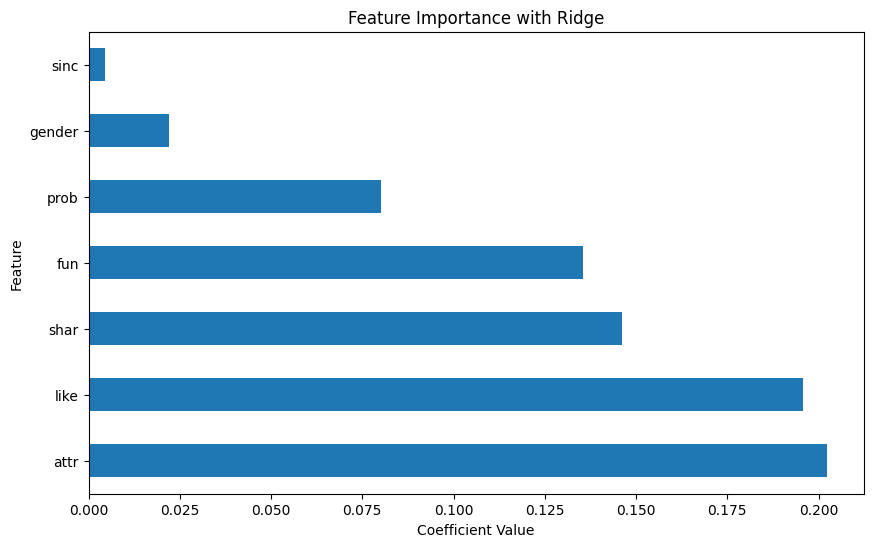

Metrics for LASSO with categorical features:
Mean Squared Error (MSE): 0.23966757474744538
Mean Absolute Error (MAE): 0.4809119625025474
R^2 Score: -0.00029630109624245726
Coefficients for LASSO: [ 0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.
 -0. -0.  0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0. -0.
 -0.  0.  0. -0.  0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0.  0.
  0.  0. -0.  0.  0.  0.  0. -0.  0.  0. -0. -0. -0. -0.  0. -0.  0.  0.
  0.  0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0.
  0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.
 -0. -0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.
  0. -0.  0.  0. -0. -0.  0.  0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0.
 -0.  0.  0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0.  0. -0.  0.  0.
 

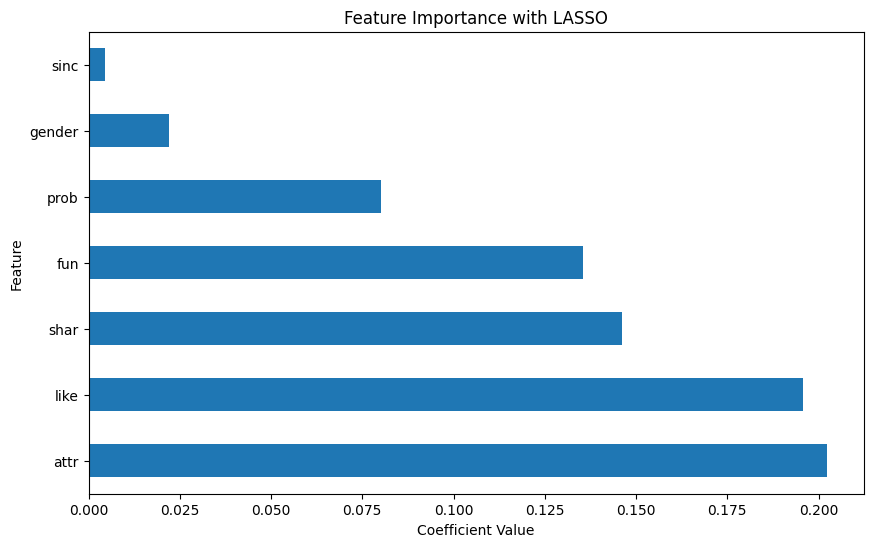

Metrics for Elastic Net with categorical features:
Mean Squared Error (MSE): 0.18649275180260413
Mean Absolute Error (MAE): 0.41281706945763735
R^2 Score: 0.22163851323658068
Coefficients for Elastic Net: [ 0.02201877 -0.          0.          0.          0.20222282  0.00455916
  0.          0.1353511   0.          0.14612208  0.19581953  0.08024854
  0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.          0.         -0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.         -0.          0.         -0.
  0.          0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.          0.

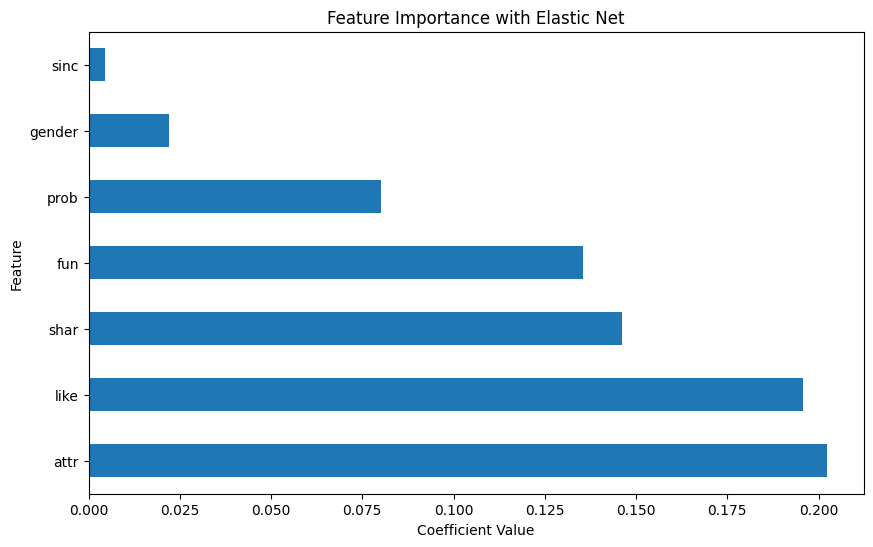

In [75]:
# Обучение Ridge, LASSO, Elastic Net с лучшими параметрами
for model_name, best_model in best_models.items():
    best_model.fit(X_train_encoded, y_train)

    # Предсказание на тестовом наборе
    y_pred = best_model.predict(X_test_encoded)

    # Вычисление метрик
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {model_name} with categorical features:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")

    # Вывод коэффициентов и свободного члена
    print(f'Coefficients for {model_name}: {best_model.coef_}')
    print(f'Intercept for {model_name}: {best_model.intercept_}')

    # Построение графика с важностью коэффициентов без значений равных 0
    plt.figure(figsize=(10, 6))
    nonzero_coef_importance = coef_importance_sorted[coef_importance_sorted != 0]
    nonzero_coef_importance.plot(kind='barh')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance with {model_name}')
    plt.show()

**Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.**

Исходя из значений метрик, Ridge Regression показывает наилучшие результаты с наименьшим MSE, наименьшим MAE и самым высоким R^2 Score. Поэтому в данном случае модель Ridge Regression кажется лучшим выбором среди представленных моделей.

In [ ]:
Metrics for Linear Regression:
Mean Squared Error (MSE): 0.13935330681023284
Mean Absolute Error (MAE): 0.30871492270508843
R^2 Score: 0.4183835777756101

| Модель            | Тип              | MSE              | MAE              | R^2 Score        |
|-------------------|------------------|------------------|------------------|------------------|
| Ridge             | Без категориальных| 0.6423           | 0.7077           | 0.3541           |
| Ridge             | С категориальными| 0.1377           | 0.3227           | 0.4253           |
| LASSO             | Без категориальных| 0.6803           | 0.7472           | 0.3159           |
| LASSO             | С категориальными| 0.2397           | 0.4809           | -0.0003          |
| Elastic Net       | Без категориальных| 0.6498           | 0.7166           | 0.3466           |
| Elastic Net       | С категориальными| 0.1865           | 0.4128           | 0.2216           |
| Linear Regression | Без категориальных| 0.6423           | 0.7075           | 0.3542           |
| Linear Regression | С категориальными| 0.1394           | 0.3087           | 0.4184           |

Использование категориальных признаков привело к значительному улучшению результатов почти для всех моделей.
- **Модель Ridge показала наилучшие значения метрик** с категориальными признаками, превосходя остальные модели.
- **Модель LASSO показала плохие результаты** с категориальными признаками, особенно в плане R^2 Score
- **Elastic Net показала стабильное улучшение** при использовании категориальных признаков, но все равно показал худшие результаты в сравнении с моделью Ridge.

В общем по результатам, я думаю что **Linear Regression** с категориальными признаками демонстрирует лучшие результаты.

**Фильтрация признаков с использованием Recursive Feature Elimination**

Выполним отбор признаков с использованием Recursive Feature Elimination (RFE)

In [79]:
rfe = RFECV(estimator=LinearRegression())
rfe.fit(X_train_encoded, y_train)
selected_features = X_train_encoded.columns[rfe.support_]

Повторное обучение моделей с отобранными признаками

In [80]:
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

In [81]:
# Fit Linear Regression with selected features
linear_reg_selected = LinearRegression()
linear_reg_selected.fit(X_train_selected, y_train)

LinearRegression()

Предсказание на тестовом наборе с отобранными признаками

In [82]:
y_pred_selected = linear_reg_selected.predict(X_test_selected)

In [85]:
mse_selected = mean_squared_error(y_test, y_pred_selected)
mae_selected = mean_absolute_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print("\nМетрики для модели Linear Regression с отобранными признаками:")
print(f"Mean Squared Error (MSE): {mse_selected}")
print(f"Mean Absolute Error (MAE): {mae_selected}")
print(f"R^2 Score: {r2_selected}")


Метрики для модели Linear Regression с отобранными признаками:
Mean Squared Error (MSE): 0.15625980779980775
Mean Absolute Error (MAE): 0.33716135243608353
R^2 Score: 0.3478212147935813


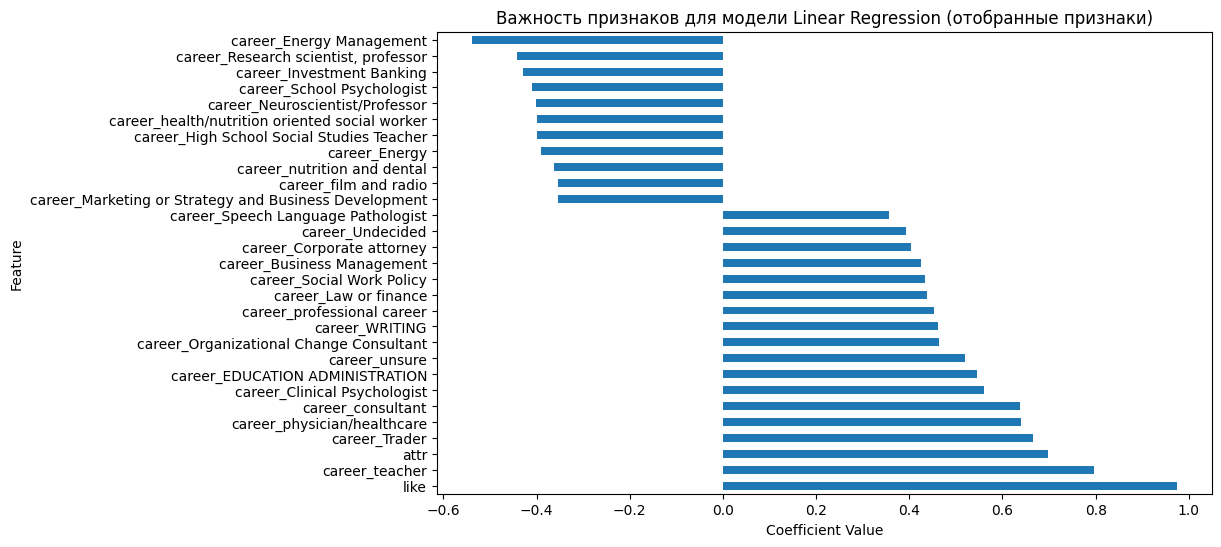

In [86]:
# Построение графика с важностью коэффициентов
plt.figure(figsize=(10, 6))
coef_importance_selected = pd.Series(linear_reg_selected.coef_, index=selected_features)
coef_importance_selected_sorted = coef_importance_selected.sort_values(ascending=False)
coef_importance_selected_sorted.plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Важность признаков для модели Linear Regression (отобранные признаки)')
plt.show()

**7. Сделать вывод:**

**Лучшим регрессором, обученным на данных с категориальными признаками**, является модель **Linear Regression**.

- **MSE:** 0.1394
- **MAE:** 0.3087
- **R^2 Score:** 0.4184

**Лучшим регрессором, обученным на данных без категориальных признаков**, так же является модель **Linear Regression**.


- **MSE:** 0.6423
- **MAE:** 0.7075
- **R^2 Score:** 0.3542

**Вывод о результатах использования Recursive Feature Elimination (лучше или хуже - значения метрик).**

- **MSE:** 0.1563
- **MAE:** 0.3372
- **R^2 Score:** 0.3478

Сравнивая эти значения с предыдущими результатами без RFE, мы можем сделать следующий вывод:

- **MSE:** Значение MSE с RFE уменьшилось с 0.6423 до 0.1563, что говорит о улучшении точности модели.
- **MAE:** Значение MAE с RFE также сократилось с 0.7075 до 0.3372, что указывает на лучшую предсказательную способность модели.
- **R^2 Score:** Значение R^2 Score осталось практически на том же уровне (0.3478 против 0.3542), что может свидетельствовать о том, что модель все так же хорошо объясняет вариацию целевой переменной.

Использование Recursive Feature Elimination привело к улучшению качества модели.